# Ejercicio 4
## Integrantes 
*
*
*
*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq

In [4]:
plt.rcParams.update({
    'font.size': 20,
    'figure.figsize': (8,8),
    'savefig.dpi': 120
})

In [86]:
def calcular_fft( x_c, Fs, N, zero_padding=None ):
    if type( N ) != int:
        resultado_fft = {
            'X': [],
            'shift_X': [],
            'freq': [],
            'N': []
        }
        for N_ in N:
            iteracion_N = resultado_fft( x_c, Fs, N_, zero_padding=zero_padding )
            resultado_fft['N'].append( N_ )
            for key in iteracion_N:
                resultado_fft[ key ].append( iteracion_N[ key ] )
    else:
        x = lambda n: x_c( n / Fs )
        n = np.arange( 0, N )
        
        if( not zero_padding ):
            zero_padding = N
        
        X = fft( x(n), zero_padding ) / Fs
        shift_X = fftshift( X )
        freq =  fftshift(fftfreq( zero_padding ) ) * Fs
        
        resultado_fft = {
            'X': X,
            'shift_X': shift_X,
            'freq': freq
        }
    return resultado_fft
        

In [87]:
def calcular_fft_fs( x_c, Fs, N, zero_padding=None ):
    if type( Fs ) != int:
        resultado_fft = {
            'fft': [],
            'Fs': []
        }
        for Fs_ in Fs:
            resultado_fft['fft'].append( calcular_fft( x_c, Fs_, N, zero_padding=zero_padding ) )
            resultado_fft['Fs'].append( Fs_ )
            
    else:
        resultado_fft = {
            'fft': calcular_fft( x_c, Fs, N, zero_padding=zero_padding )
        }
    return resultado_fft

In [88]:
escalon = lambda t: np.piecewise( t, t>=0,[1, 0] )
x_c = lambda t: -escalon( 3-t ) * escalon( t )
x = lambda n: x_c( n / Fs )

In [102]:
fft_a = calcular_fft( x_c, 10, 64, 1024*2)

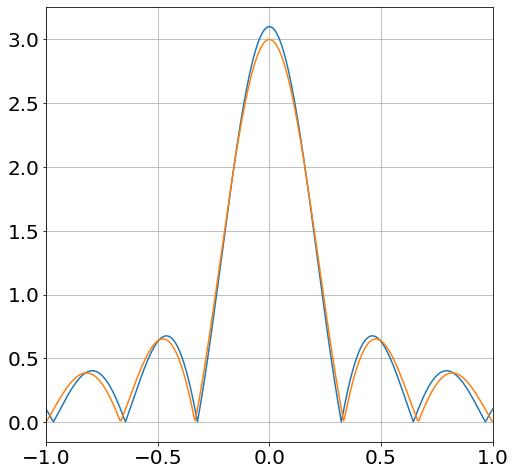

In [103]:
plt.plot( fft_a['freq'], np.abs(fft_a['shift_X']) )
plt.plot( fft_a['freq'], abs(envolvente( fft_a['freq'] )) )
plt.xlim( [-1, 1] )
plt.grid()

In [100]:
envolvente = lambda f: 3 * np.sinc( 3 * f )

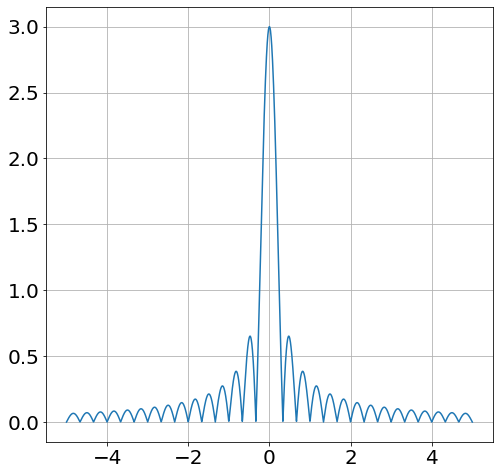

In [101]:
plt.plot( t, abs(envolvente(t)) )
plt.grid()

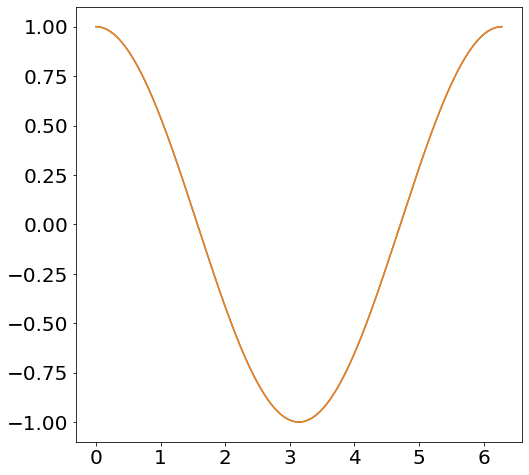

In [106]:
t = np.linspace( 0, 2*np.pi, 1000 )
plt.plot( t, np.cos(t ) )
plt.plot( t, np.sin(t + np.pi/2) )